In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
config_file ='ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model ='frozen_inference_graph.pb'

In [3]:
model = cv2.dnn_DetectionModel(frozen_model, config_file)

In [4]:
classLabels = []
file_name='labels.txt'
with open(file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

In [5]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [6]:
print(len(classLabels))

80


In [7]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5)) # Corrected typo
model.setInputSwapRB(True)


< cv2.dnn.Model 000001DDD0EDD850>

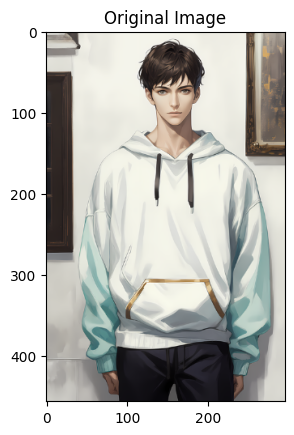

Detected Class Indices: [1]


In [8]:


img = cv2.imread('boy.png')
# FIX 2: Matplotlib expects RGB, OpenCV reads BGR. Convert for correct display.
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image') # Added a title for clarity
plt.show() # FIX 3: Need to call plt.show() to display the image

ClassIndex , confidece , bbox = model.detect(img,confThreshold =0.5)
print("Detected Class Indices:", ClassIndex) # More descriptive print statement

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf , boxes in zip(ClassIndex.flatten() , confidece.flatten() , bbox):
    cv2.rectangle(img , boxes, (255,0,0),2)
    # FIX 4: Corrected typo in text placement for cv2.putText
    # The 'boxes[1]40' is a syntax error. It should be 'boxes[1] + 40'
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font, fontScale = font_scale,color=(0,255,0),thickness=3)



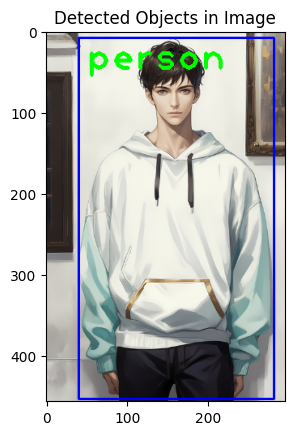

In [9]:
# FIX 5: Typo: plt.Imshow should be plt.imshow
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Detected Objects in Image') # Added a title
plt.show() # FIX 6: Need to call plt.show() to display the image

In [10]:
# Video
# FIX 7: Typo: 'cep' should be 'cap' for consistency with the rest of the video handling
cap = cv2.VideoCapture('new_york.mp4')

if not cap.isOpened():
    # FIX 8: This line will try to open the camera (index 0) if the file fails.
    # It's good, but ensure you want this fallback.
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Can't open the video or camera.") # Improved error message

# font_scale and font are already defined, no need to redefine unless scope changes.
# font_scale = 3
# font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame = cap.read()

    # FIX 9: Handle the case where frame is not read (e.g., end of video)
    if not ret:
        print("End of video stream or cannot read frame.")
        break # Exit the loop if frame cannot be read

    ClassIndex, confidece , bbox = model.detect(frame, confThreshold = 0.55)

    # print(ClassIndex) # This can be very verbose, comment out for cleaner output

    if(len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
            # FIX 10: Class indices in COCO dataset are typically 1-80.
            # This check is usually good, but ensure it aligns with your labels.txt
            if(ClassInd <= 80): # Keep this check if your labels are 1-80
                cv2.rectangle(frame, boxes, (255,0,0),2)
                # FIX 11: Corrected typo in cv2.putText arguments
                # The 'boxes[0]+10,boxes[1]+40)' needs to be within one tuple.
                cv2.putText(frame, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0,255,0), thickness=3)

    # FIX 12: Indentation error here. cv2.imshow and if cv2.waitKey should be outside the ClassIndex 'if' block
    # so that the frame is always displayed, even if no objects are detected.
    cv2.imshow('Object Detection',frame) # Changed window title for clarity

    # FIX 13: Typo: waitkey should be waitKey (case sensitive)
    if cv2.waitKey(2) & 0xff == ord('q'):
        break

cap.release()
# FIX 14: Typo: destroyaLLWindows should be destroyAllWindows
cv2.destroyAllWindows()

End of video stream or cannot read frame.
